In [1]:
import numpy as np

from enum import Enum
from dataclasses import dataclass

import matplotlib.pylab as plt
import matplotlib.patches as mpatches
from matplotlib.animation import FuncAnimation
from IPython.display import Image, display

In [2]:
# global constant
rng = np.random.default_rng(422522)

col = ['b', 'g', 'c', 'm', 'y', 'r']

xlim = 20
ylim = 20

class State(Enum):
    Type1 = 1
    Type2 = 2
    Type3 = 3
    Type4 = 4
    Type5 = 5
    Type6 = 6
    
@dataclass
class Crypt:
    x: float
    y: float
    type: State

In [3]:
# util functions
def plotColon(crypts):
    # Extract x, y, and state values from Crypt objects
    x_vals = [crypt.x for crypt in crypts]
    y_vals = [crypt.y for crypt in crypts]
    types = [crypt.type.value for crypt in crypts]  # Extract the enum values

    # Create the plot
    plt.figure(figsize=(4, 4))
    
    # Map the states to corresponding colors
    plt.scatter(x_vals, y_vals, c=[col[state - 1] for state in types], s=10)

    # Create the legend
    patches = [mpatches.Patch(color=col[i], label=f'State {i + 1}') for i in range(6)]
    plt.legend(handles=patches, title="State", loc='upper right')

    # Set chart properties
    plt.title("Scatter Plot of Crypts by State")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.grid(True)
    plt.axis("equal")
    plt.xlim(-xlim - 1, xlim + 1)
    plt.ylim(-ylim - 1, ylim + 1)
    plt.show()

def plotSimulation(U, tspan):
    fig, ax = plt.subplots(figsize=(4, 4))
    patches = [mpatches.Patch(color=col[i], label=f'State {i + 1}') for i in range(6)]
    ax.legend(handles=patches, title="State", loc='upper right')
    ax.set_xlim(-xlim - 1, xlim + 1)
    ax.set_ylim(-ylim - 1, ylim + 1)
    ax.set_title("Simulation of Crypts")
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.grid(True)
    plt.close(fig)
    sc = ax.scatter([], [], s=10)

    # Function to update the plot for each frame
    def update(frame):
        crypts = U[frame]
        sc.set_offsets(np.column_stack([[crypt.x for crypt in crypts], [crypt.y for crypt in crypts]]))
        sc.set_color([col[state - 1] for state in [crypt.type.value for crypt in crypts]])
        ax.set_title(f'Time: {tspan[frame]:.2f}')
        return sc,  # return in tuple

    # Create the animation using FuncAnimation
    animation = FuncAnimation(fig, update, frames=len(tspan), blit=False)

    # Save the animation as a GIF
    animation.save(f"simulation.gif", writer="pillow", fps=8)
    display(Image(filename="simulation.gif"))

In [4]:
# simulation configuration
tspan = np.linspace(0, 10, 5)

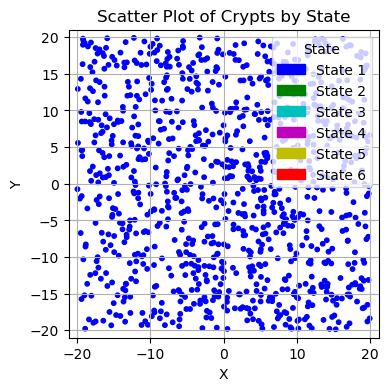

In [5]:
# crypts initialization
U0 = []
num_points = 1000
for _ in range(num_points):
    x = rng.uniform(-xlim, xlim)
    y = rng.uniform(-ylim, ylim)
    type = State.Type1
    U0.append(Crypt(x, y, type))
plotColon(U0)

In [6]:
# simulation

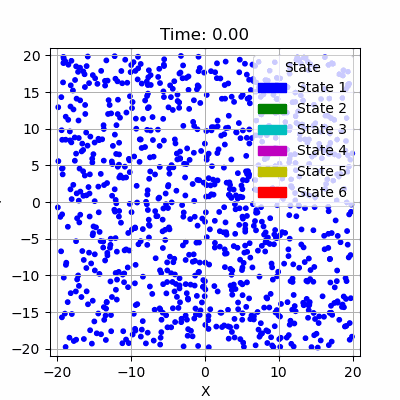

In [7]:
# plot simulation result
plotSimulation([U0, U0, U0, U0, U0], tspan)